In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as npa




In [2]:
def dx(x, y, dt):
    return dt*(x - y - x*(x**2 + y**2))
    
    
def dy(x, y, dt):  
    return dt*(x + y - y*(x**2 + y**2))

<IPython.core.display.Javascript object>


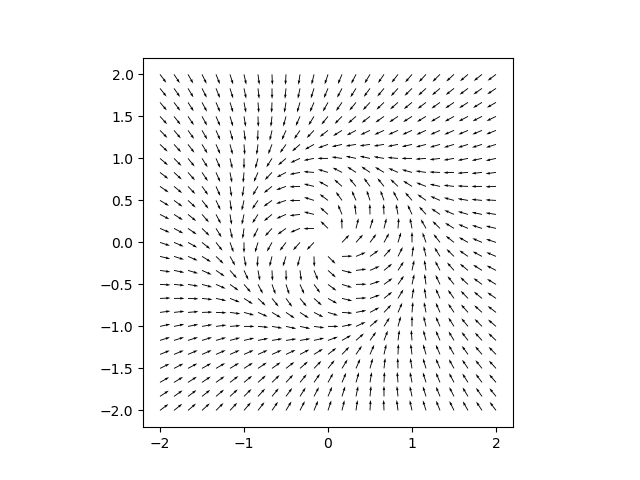

In [12]:
n = 25
dt = 0.01
X, Y = np.meshgrid(np.linspace(-2, 2, n), np.linspace(-2, 2, n))
U = dx(X, Y, dt)
V = dy(X, Y, dt)


k = np.sqrt(U**2 + V**2) 
U = U / k
V = V / k


# V = V * (1/np.abs(U))
# U = np.ones(U.shape)

# V = np.tan(np.arctan2(U, V))
# U = np.ones(U.shape)


# amp = np.max(U)/U
# U = U * amp
# V = V * amp

plt.figure()
plt.quiver(X, Y, U, V, angles='xy', units='xy', pivot='tail',scale=8)
plt.gca().set_aspect("equal")

<IPython.core.display.Javascript object>


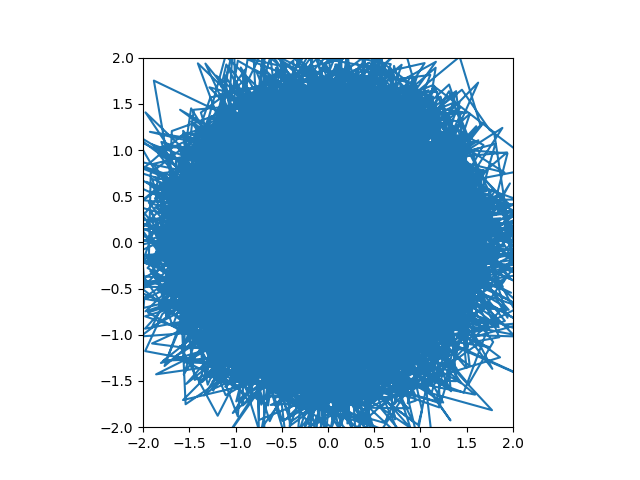

In [13]:
# xy = npa([1.5, 1.5])[None]
xy = npa([0.5, 0.2])[None]
dt = 0.1
for i in range(1, 10000):
    x = xy[-1, 0] + dx(xy[-1, 0], xy[-1, 1], dt)
    y = xy[-1, 1] + dy(xy[-1, 0], xy[-1, 1], dt)
    noise = np.random.randn(2) * dt * 4
#     noise = np.random.uniform(-1, 1, 2) * dt * 10
    xy = np.vstack([xy, [x, y]+ noise])
    
plt.figure()
plt.plot(xy[:, 0], xy[:, 1])
# plt.axis('equal')
# plt.axis([-2, 2, -2, 2])

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()
plt.gca().set_aspect("equal")
#     plt.axis('equal')
    

# xy

In [5]:
import NTIC
import dit

cgState = np.digitize(xy, np.linspace(-2, 2, 3), right=False)
d = NTIC.RandomVariableSet()
d.CreateDistFromTimeSeries(cgState)
d.setYtEt(Yt=list(range(cgState.shape[1])))
d.print()
dit.shannon.mutual_information(d.dd, d.Yt_, d.Yt)

Class:          Distribution
Alphabet:       ('0', '1') for all rvs
Base:           linear
Outcome Class:  tuple
Outcome Length: 6
RV Names:       (0, 1, 2, 3, 4, 5)

x                                p(x)
('0', '0', '0', '0', '0', '1')   0.125
('0', '0', '1', '1', '1', '1')   0.125
('0', '1', '0', '1', '1', '0')   0.125
('0', '1', '1', '1', '1', '0')   0.125
('1', '0', '0', '1', '1', '0')   0.125
('1', '0', '1', '0', '0', '1')   0.125
('1', '1', '0', '1', '0', '0')   0.125
('1', '1', '1', '1', '0', '0')   0.125
Class:          Distribution
Alphabet:       ('0', '1') for all rvs
Base:           linear
Outcome Class:  tuple
Outcome Length: 6
RV Names:       (0, 1, 2, 3, 4, 5)

x                                p(x)
('0', '0', '0', '0', '0', '1')   0.125
('0', '0', '1', '1', '1', '1')   0.125
('0', '1', '0', '1', '1', '0')   0.125
('0', '1', '1', '1', '1', '0')   0.125
('1', '0', '0', '1', '1', '0')   0.125
('1', '0', '1', '0', '0', '1')   0.125
('1', '1', '0', '1', '0', '0')   0.125
('1',

0.9416827613545369

In [14]:
import NTIC
import dit
xyResample = xy[0::10]

I = []
nBin = range(2, 300, 20)
for i in nBin:
    cgState = np.digitize(xyResample, np.linspace(-2, 2, i), right=False)
    d = NTIC.RandomVariableSet()
    d.CreateDistFromTimeSeries(cgState)
    d.setYtEt(Yt=list(range(cgState.shape[1])))
    # d.print()
    I.append(dit.shannon.mutual_information(d.dd, d.Yt_, d.Yt))
#     if np.mod(i, 10) == 1:
#         print(i)
    print(i)
    
print('Done')

2
22
42
62
82
102
122
142
162
182
202
222
242
262
282
Done


<IPython.core.display.Javascript object>


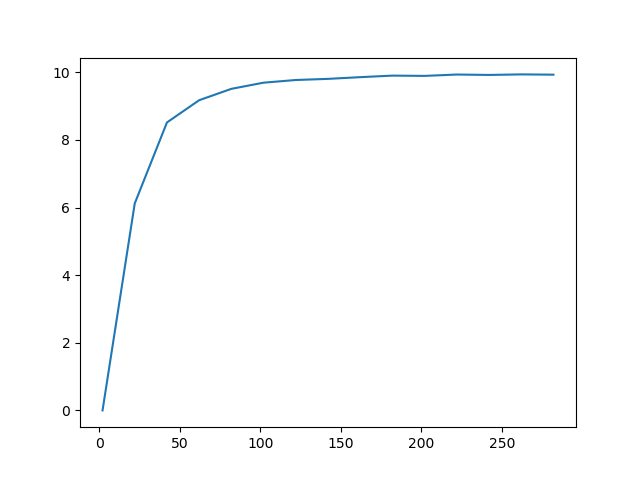

<IPython.core.display.Javascript object>


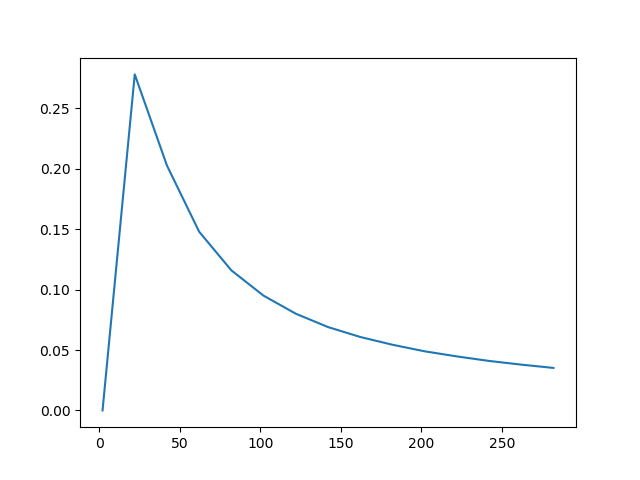

<IPython.core.display.Javascript object>


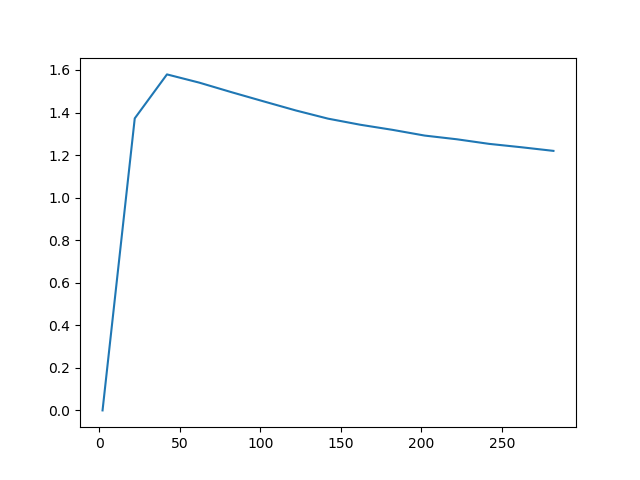

In [15]:
plt.figure()
plt.plot(nBin, I)
plt.figure()
plt.plot(nBin, npa(I) / npa(nBin))
plt.figure()
plt.plot(nBin, npa(I) / np.log2(npa(nBin)))